<a href="https://colab.research.google.com/github/mahdiehhojabri/CommentRecognizer-ImdbData/blob/main/imdb_data_comment_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading data

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
#preprocessing

import numpy as np
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)        

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
#Network architecture

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [ ]:
#configuring learning process

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#Training

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6015 - accuracy: 0.6901 - val_loss: 0.3861 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3273 - accuracy: 0.9003 - val_loss: 0.3042 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2306 - accuracy: 0.9283 - val_loss: 0.3100 - val_accuracy: 0.8741
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1795 - accuracy: 0.9438 - val_loss: 0.2773 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1455 - accuracy: 0.9549 - val_loss: 0.2802 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1215 - accuracy: 0.9646 - val_loss: 0.2913 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1022 - accuracy: 0.9716 - val_loss: 0.3060 - val_accuracy: 0.8836
Epoch 8/20
30

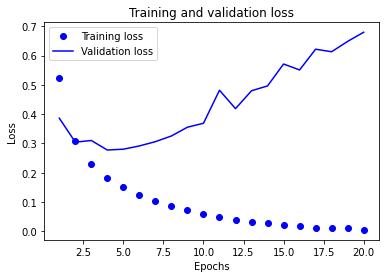

In [ ]:
# Training and Validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

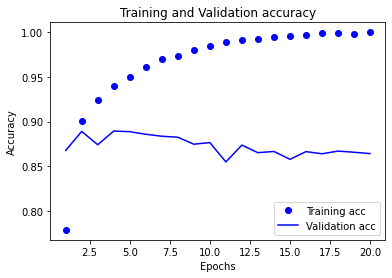

In [ ]:
# Training and Validation accuracy

plt.clf()

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#Retrain
#by using the validation data and according to the plots of both previous stages, we realized that epoch=4 is the best number,so we will train again:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
30/30 [==============================] - 1s 24ms/step - loss: 0.6170 - accuracy: 0.6958
Epoch 2/4
30/30 [==============================] - 1s 24ms/step - loss: 0.3543 - accuracy: 0.9001
Epoch 3/4
30/30 [==============================] - 1s 25ms/step - loss: 0.2565 - accuracy: 0.9241
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2907 - accuracy: 0.8847


In [ ]:
predict = model.predict(x_test)
predict

array([[0.1705563 ],
       [0.99852777],
       [0.7455042 ],
       ...,
       [0.07574809],
       [0.09482387],
       [0.40328914]], dtype=float32)